# Biomedical Engineering Week11 Practice

**Erosion of a Landscape**

For this homework, you will use an existing landscape evolution code that differs from the computer lab’s version by the presence of an ocean and the absence of uplifting forces. In the first part of the assignment you will be asked to interpret the provided simulation code, and in the second part, you will be asked to simulation the erosion of a landscape that you created yourself.

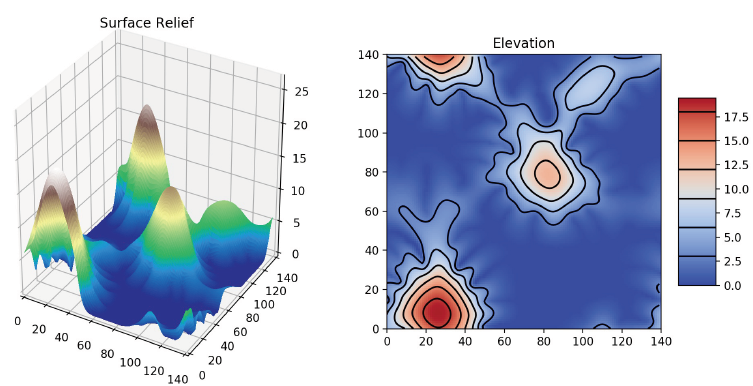

(1) Download the Python file, landscapeWithOcean.py and the notebook
erosion_with_ocean.ipynb. Execute all cells in the notebook. (If the code runs too slowly on your computer, reduce the number of grid points NX or NY.) Describe in your own words, how the initial conditions are chosen and what geological features they represent.

Have a look inside `landscapeWithOcean.py` and give an interpretation of the variable `oceanLevelParameter`.

Run the code several times and describe the resulting evolution. Say how the geological features change with time. What happens in the oceans?

(2) Please modify the code and replace existing initial conditions with your own ideas and code.

(3) Now change the simulation parameters including K, D, n, m, the ocean level, and maybe dt and also the spatial resolution in order to erode you own landscape in a different way. Say what effects the parameter changes had. Points be assigned for good descriptions. See if you find some interesting effects.

* 期中考 K,D,n,m哪一個參數可以讓結果變化的更快
* 此份作業的問題需要仔細看
1. 哪個參數會影響landscape
2. 為什麼長這樣(水流過間距)
3. 產生異形landscape

In [ ]:
## Import necessary packages

# On Macs use osx or tk
# For Windows use qt

import numpy as np
from numpy.random import rand
from landscapeWithOcean_vectorized_JT import LandscapeWithOcean # Import methods from inside file landscapeWithOcean.py

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
def AddHill(Z,NX,NY,xx,yy,r,h):

    for x in range(NX):
        for y in range(NY):
            dx = np.mod(x-xx+NX/2,NX)-NX/2; # difference i-i0 but apply p.b.c.
            dy = np.mod(y-yy+NY/2,NY)-NY/2;
            dr = np.sqrt(dx**2+dy**2);
            if (dr<r):
                Z[x,y] += h * (np.cos(dr/r*np.pi/2.0))**2;

    return Z

In [ ]:
### Define simulation grid and initial conditions

NX = 50*5 #number of rows
NY = 50*5 #number of columns

d  = 5 # grid spacing in meters
dx = d # keep dx=dy for simplicity
dy = d

LX=NX*dx
LY=NY*dy

# small random features in topography to begin erosion
Z = rand(NX,NY)*0.1
for i in range(5):
    xx = rand()*NX
    yy = rand()*NY
    r  = (0.1+rand())*NX
    h  = (0.1+rand())*5
    Z = AddHill(Z,NX,NY,xx,yy,r,h)

for i in range(5):
    xx = rand()*NX
    yy = rand()*NY
    r  = (0.1+rand())*NX/2
    h  = (0.5+rand())*10
    Z = AddHill(Z,NX,NY,xx,yy,r,h)

x = np.arange(NX)
y = np.arange(NY)
X,Y = np.meshgrid(y,x) #strange that y goes first !!!
ZMaxOrg = np.max(Z)
#print(ZMaxOrg)

In [ ]:
### Physical Parameters
K = 10.0e-6 # meters^(1-2m)/yr

D = 0.05 # m^2/yr

# uplift rate
# uplift = 0.03 / 600.
uplift = 0.0

In [ ]:
### Model parameters

# Time step
dt = d**2 / D / 8.
#dt = d**2 / D /16. #extra small steps
print(' dt[years] = ',dt)

#Area exponent A^m, default m=1
m=1

#gradient exponent g^n, default n=1
n=1

#erosion threshold
theta_c = 10

 dt[years] =  62.5


In [ ]:
# Total simulation time
T = 1000.0*62.5

# total number of iterations
n_iter = int(np.round(T/dt))
print('Number of interation: ',n_iter)

Number of interation:  1000


In [ ]:
# Initialize landscape
ls = LandscapeWithOcean(NX,NY)

oceanLevelParameter=0.5  # what does this parameter do?
ls.ComputeOceanVolumeFromOceanLevelParameter(Z,NX,NY,oceanLevelParameter)

ls.pool_check(Z,NX,NY)
ls.A = np.zeros((NX,NY))

Minimum elevation           1.9647446853290806
Maximum elevation           20.193010858693796
Beach level                 11.078877772011438
Ocean volume                162644.1238723059
Percentage of ocean surface 62.452799999999996


In [ ]:
# Set-up figure
def init_figure():
    fig = plt.figure(figsize=(12.,6.))
    plt.show()
    return fig

def update_figure():
        plt.clf()
        ax1 = fig.add_subplot(121,projection='3d')

        # use equal x-y aspect with an explicit vertical exageration
        vert_exag = 4.
        ax1.set_xlim3d(0,max(NX,NY))
        ax1.set_ylim3d(0,max(NX,NY))
        ax1.set_zlim3d(0,ZMaxOrg)

        ax1.set_title('Surface Relief')

#        surf = ax1.plot_surface(X,Y,Z, cmap = cm.terrain, rstride=1, cstride=1,
#                antialiased=False,linewidth=0)

        ZPlot = np.copy(Z)
        ZPlot[ZPlot<ls.ZBeachLevel] = ls.ZBeachLevel
        ZPlot -= ls.ZBeachLevel
        ax1.plot_surface(X,Y,ZPlot, cmap = cm.terrain, rstride=1, cstride=1,
                antialiased=False,linewidth=0)

        ax2 = fig.add_subplot(122,aspect='equal')
        ax2.set_title('Elevation')

        #im = ax2.pcolor(Z,cmap=cm.terrain)
        im = ax2.pcolor(ZPlot,cmap=cm.coolwarm)
        cs = ax2.contour(ZPlot,6,colors='k')

        # Add a color bar which maps values to colors.
        cbar = fig.colorbar(im, shrink=0.5, aspect=5)
        # Add the contour line levels to the colorbar
        cbar.add_lines(cs)

        #plt.show()
        plt.draw()
        plt.pause(0.0001)

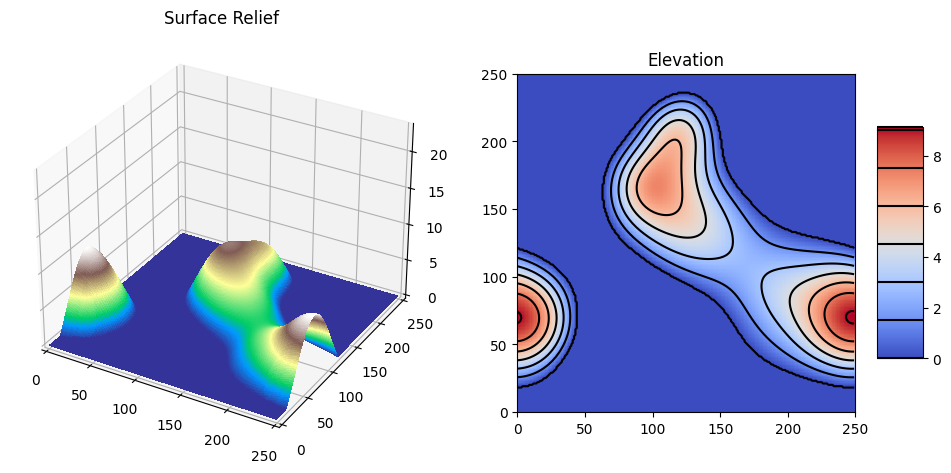

In [ ]:
fig = plt.figure(figsize=(12.,6.))
update_figure()

In [ ]:
# Set up figure
fig = init_figure()
update_figure()
Znew = np.copy(Z)

for it in range(1,n_iter+1):

    ls.calculate_collection_area(Z,NX,NY)
    ls.A *= dx*dy

    for i in range(NX):
        iL = np.mod(i-1,NX) # normally i-1 but observe p.b.c.
        iR = np.mod(i+1,NX) # normally i+1 but observe p.b.c.

        for j in range(NY):
            jD = np.mod(j-1,NY) # normally j-1 but observe p.b.c.
            jU = np.mod(j+1,NY) # normally j+1 but observe p.b.c.

            if ls.ocean[i,j]>0:
                Psi_z  = 0;
                Phi_z  = 0;
            else:
                if ls.drain[i,j]>0: #this cell is a drain
                    s1 = (Z[iR,j]  - Z[iL,j] )/(2.*dx)
                    s2 = (Z[i,jU]  - Z[i,jD] )/(2.*dy)
                    s3 = (Z[iR,jD] - Z[iL,jU])/(2. * np.sqrt( dx**2 + dy**2) )
                    s4 = (Z[iR,jU] - Z[iL,jD])/(2. * np.sqrt( dx**2 + dy**2) )
                    gradient = (np.sqrt(s1**2 + s2**2) + np.sqrt(s3**2 + s4**2))/2.
                    Psi_z = K * ( ls.A[i,j]**m * gradient**n - theta_c)

                elif ls.drainage[i,j]>0: #this cell is a drainage point (it drains a pool)

                    if (Z[i,j]>=Z[iR,j]) and ls.pool[iR,j]!=ls.drainage[i,j]:
                        gradient = (Z[i,j]-Z[iR,j])/dx #pool is on my left, I drain to the right, use this gradiant
                    elif (Z[i,j]>=Z[iL,j]) and ls.pool[iL,j]!=ls.drainage[i,j]:
                        gradient = (Z[i,j]-Z[iL,j])/dx
                    elif (Z[i,j]>=Z[i,jU]) and ls.pool[i,jU]!=ls.drainage[i,j]:
                        gradient = (Z[i,j]-Z[i,jU])/dy
                    elif (Z[i,j]>=Z[i,jD]) and ls.pool[i,jD]!=ls.drainage[i,j]:
                        gradient = (Z[i,j]-Z[i,jD])/dy
                    else:
                        gradient = 0.02 # ??? This does happen (maybe when two pools merge)
                    Psi_z = K * ( ls.A[i,j]**m * gradient**n - theta_c)

                else: #this cell is a pool, assume it has some mass diffusion but no erosion!
                    Psi_z = 0.

                if (Psi_z<0):
                    Psi_z = 0.

                # diffusion term
                Phi_z = D * ( (Z[iR,j] - 2.*Z[i,j] + Z[iL,j]) / dx**2 \
                            + (Z[i,jU] - 2.*Z[i,j] + Z[i,jD]) / dx**2 )

            Znew[i,j] = Z[i,j] + (Phi_z - Psi_z + uplift )*dt

            dZdt= (Znew[i,j] - Z[i,j]) / dt
            CFL = abs(dZdt) * dt / min(dx,dy)
            if (CFL>1.0):
                print('\nWarning: Time step of',dt,'is probably too large. Safer would be:',dt/CFL)

            if (Znew[i,j]<0.):
                Znew[i,j] = 0. # yes, this does happen at the boundary when kept at zero

    #Znew[0,:] = 0.0 # resets front boundary to 0
    Z = np.copy(Znew)

    ls.pool_check(Z,NX,NY)

    if (np.mod(it,50)==0):
        print(it,end='')
        #update_figure()
        print(' Ocean level=',ls.ZBeachLevel,' Ocean surface fraction=',100*ls.AOcean/(NX*NY));
        #plt.savefig('erosion_16_vectorized_14min'+str(it)+'.pdf', bbox_inches='tight')
        fig = plt.figure(figsize=(12.,6.))
        update_figure()
    else:
        print('.',end='')

update_figure()
print(' Simulation finished.')


Output hidden; open in https://colab.research.google.com to view.